## Phase 1 Project 

Please fill out:
* Student name: Ruth Nanjala Mayungu
* Student pace: full time
* Scheduled project review date/time: 09/15/2023 12:00 noon
* Instructor name:
* Blog post URL: 


## Unveiling Box Office Success: Guiding Microsoft's New Movie Studio

## 1. Introduction

Microsoft, a technology giant renowned for its innovation, has set its sights on the world of original video content. The company aims to establish a new movie studio, marking its entry into the film industry. This ambitious endeavor offers Microsoft the potential for cross-industry growth, market diversification, and creative expression. However, creating successful movies requires a profound understanding of the industry landscape.

In this project, we embark on a cinematic journey to explore the current trends and patterns driving success at the box office. Our mission is to equip Microsoft's new movie studio with actionable insights, enabling them to make informed decisions about the types of films they should produce. By dissecting the performance of recent films, we aim to guide Microsoft towards its cinematic aspirations.

## 1.1 Business Problem

Microsoft's entry into movie production is an exciting prospect, but it comes with its share of challenges. The primary challenge is deciphering the elements that contribute to a movie's success in terms of box office performance. To make strategic decisions and investments, Microsoft needs to understand the current dynamics of the film industry. The objective is to identify the genres and attributes that resonate most with audiences and lead to box office triumph.

## 1.2 Main Objective

Our overarching goal is to unravel the secrets of box office success in the contemporary film landscape. To achieve this, we set the following specific objectives:

- Identify the Most Popular Movie Genres.
- Analyze Viewer Preferences within Top Genres.
- Provide Insights for Genre Selection.
- Explore the Impact of Average Ratings, Runtimes, Budgets, and Production Budgets on Movie Profitability.

## 1.3 Data Understanding

Our analysis relies on data collected from various sources, including Box Office Mojo and IMDB. Key variables under examination include:

- Genres: The categorization of movies into specific genres, reflecting their style and subject matter.
- Production budget: The expenditure associated with producing a movie.
- Worldwide gross: The cumulative revenue generated by a movie from all global screenings.
- Profit: Calculated as the difference between worldwide gross and production budget.

## 1.4 Document Structure

This document follows a structured approach to guide our analysis and present our findings effectively:

- Data Acquisition and Initial Exploration
- Data Cleaning and Preprocessing
- Exploratory Data Analysis
- Conclusions and Strategic Recommendations

Our analysis will provide valuable insights for Microsoft's new movie studio, empowering them to navigate the complex world of film production and contribute to the evolution of the entertainment industry.

First we import the libraries needed in our analysis.

## 2. Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect("im.db")

In [71]:
pip install seaborn

We then load and read the data from the specific documents that align with our objectives.

## 3. Data Understanding

## 3.1 Reading data and its conversion to Panda DataFrames,
We will first retrieve the data we need from the various data sources we have and ensure it is in Pandas DataFrame for easier manipulation.

In [72]:
# 1. Movie_budget table
Movie_budget = pd.read_csv("tn.movie_budgets.csv")

Movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [73]:
df_movie_budget = pd.read_csv("tn.movie_budgets.csv")

In [74]:
# 2. Movie_basic table 
q = ("""
SELECT *
FROM movie_basics;
""")
pd.read_sql(q,conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [75]:
df_movie_basics = pd.read_sql(q,conn)

In [76]:
# 3. Movie_ratings table 
q = ("""
SELECT *
FROM movie_ratings;
""")
pd.read_sql(q,conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [77]:
df_movie_ratings = pd.read_sql(q,conn)

## 4. Data Preparation

## 4.1 Joining the Data Frames

First we begin by joining the two data frames into one for analysis.

In [78]:
# Merge the two datasets
q = """
SELECT *
FROM movie_basics AS b
LEFT JOIN movie_ratings AS r
ON b.movie_id = r.movie_id
WHERE r.movie_id IS NOT NULL;
"""

table = pd.read_sql(q,conn)
table.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,tt10356526,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,tt10384606,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,tt1042974,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",tt1043726,4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",tt1060240,6.5,21


We then convert the table into a Pandas DataFrame for easier analytical manipulations.

In [79]:
df_table = pd.read_sql(q,conn)

## 4.2 Data Cleaning

We then move on to cleaning up the data by ensuring that the are no duplicate or missing calues within the data set we are to work on. We will begin with cleaning data in the Movie_budget data set by Converting columns like "production_budget," "domestic_gross," and "worldwide_gross" to numeric values (remove the dollar signs and commas).
Converting the "release_date" column to a datetime format if needed.

In [80]:
# Remove dollar signs and commas, and convert to numeric
columns_to_clean = ["production_budget", "domestic_gross", "worldwide_gross"]

for column in columns_to_clean:
    df_movie_budget[column] = df_movie_budget[column].str.replace('$', '').str.replace(',', '').astype(float)

# Convert "release_date" to datetime
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

df_movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [81]:
# Let's check for missing values in the merged dataset
missing_values = df_table.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64


In [82]:
# Remove rows with missing values
df_cleaned = df_table.dropna()

In [83]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)



No duplicate rows found.


Since there are no duplicate values and the missing values are done away with, I can proceed to make my data decision.

## 4.2 Making a Data Decision
I then decided that, given the availability of the datasets containing information on movie production budgets, domestic gross, and worldwide gross, in the Movie_budget data set, I will conduct a bivariate analysis to explore the relationship between movie genres and profitability, ratings, runtimes, budgets, and production budgets. This analysis will provide insights into genre preferences and investment opportunities for Microsoft's potential entry into the movie industry.

## 5. Data Analysis and Visualization

This will be led by the various objectives I aim to resolve by the end of the data analysis.

## 5.1 Identify the Most Popular Movie Genres

To determine the most popular movie genres, we will calculate the frequency of each genre in the dataset. We'll then identify the genres that appear most frequently. We can then have a plot for top genres visualization.

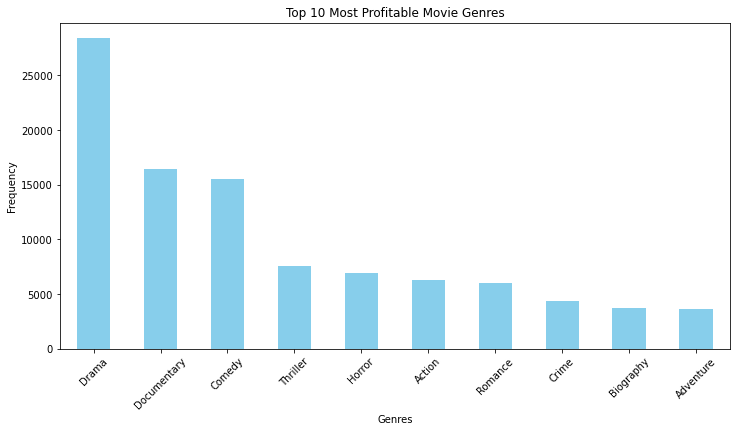

In [84]:
# Count the frequency of each genre
genre_counts = df_cleaned['genres'].str.split(',').explode().str.strip().value_counts()

# Select the top 10 most prolific genres
top_10_genres = genre_counts.head(10)

# Plot the top 10 most prolific genres
plt.figure(figsize=(12, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Profitable Movie Genres')
plt.xticks(rotation=45)
plt.show()



## Results
From the graph we can deduce that, the most popular genre is Drama followed by the Documentart genre. Therefore the best genre for the Microsoft corporation to venture into would be Drama in the Film Industry.

## 5.2 Investigate the Impact of Average Ratings, Runtimes, Budgets, and Production Budgets on Movie Profitability

For this objective, we'll perform a bivariate analysis to explore the relationship between these factors (average ratings, runtimes, budgets, and production budgets) and movie profitability. We'll calculate profitability as the difference between worldwide gross and production budget and analyze how each of these factors correlates with profitability.

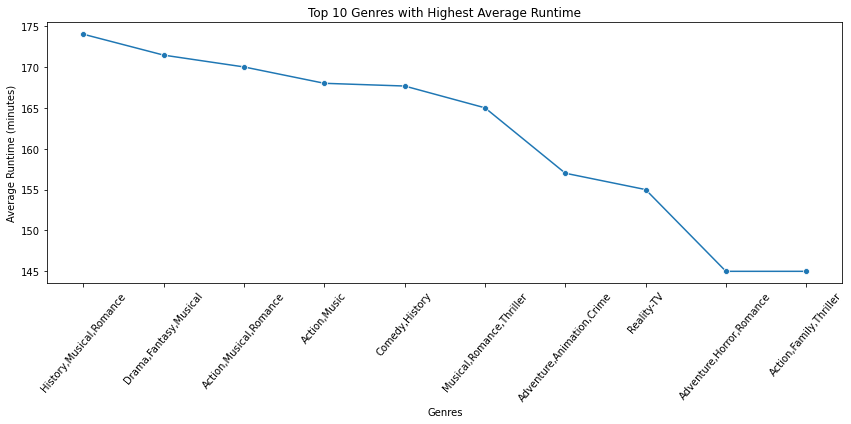

In [85]:
# Calculate the average runtime for each genre
genre_avg_runtime = df_cleaned.groupby('genres')['runtime_minutes'].mean().reset_index()

# Sort genres by average runtime in ascending order
genre_avg_runtime = genre_avg_runtime.sort_values(by='runtime_minutes', ascending=False)

# Select the top 10 genres
top_10_genres = genre_avg_runtime.head(10)

# Create a line plot of average runtime for the top 10 genres
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_genres, x='genres', y='runtime_minutes', marker='o')
plt.xticks(rotation=50)
plt.xlabel('Genres')
plt.ylabel('Average Runtime (minutes)')
plt.title('Top 10 Genres with Highest Average Runtime')
plt.tight_layout()
plt.show()

## Results
The result here shows the average rate of runtime for the various genres in the film industry. Which in turn shows that from the graph before, the most popular genre does not necessarily have the highest runtime, but it is also on the high scale compared to the rest of the genres.

We then calculate the average rating of each genre.

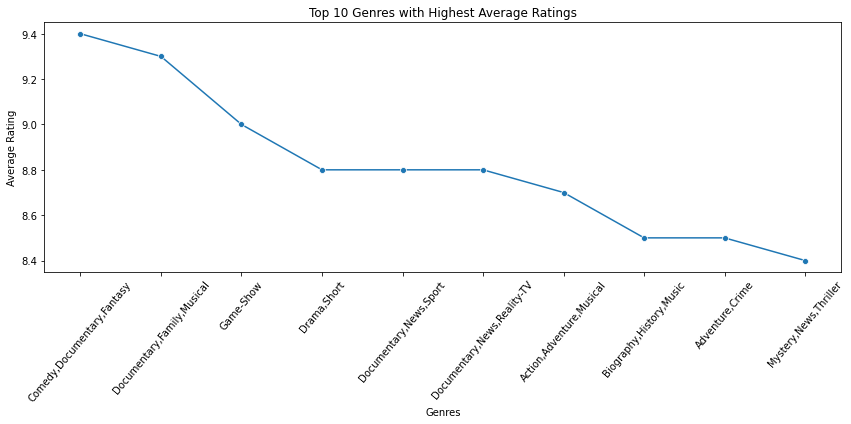

In [86]:
# Calculate the average rating for each genre
genre_avg_ratings = df_cleaned.groupby('genres')['averagerating'].mean().reset_index()

# Sort genres by average rating in descending order
genre_avg_ratings = genre_avg_ratings.sort_values(by='averagerating', ascending=False)

# Select the top N genres (e.g., top 10)
top_n_genres = 10
top_genres = genre_avg_ratings.head(top_n_genres)

# Create a line plot of average ratings for the top genres
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genres, x='genres', y='averagerating', marker='o')
plt.xticks(rotation=50)  # Rotate x-axis labels for better readability
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title(f'Top {top_n_genres} Genres with Highest Average Ratings')
plt.tight_layout()
plt.show()

## Result
This calculation also resulted in showing that the ratings of the film genres also does not necessarily correlate with the runtime. But the genres that scored highly on the runtime do fairly well in ratings.

We can now view the most profitable movies in the film industry over time to see how their budget influenced their profitability.

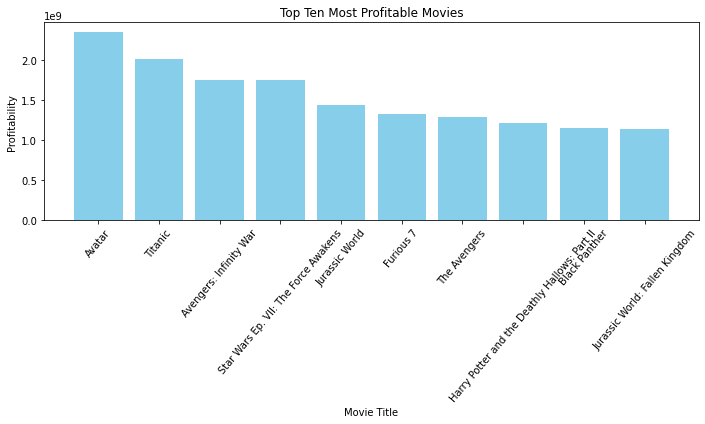

In [87]:
# Calculate profitability for each movie
df_movie_budget['profitability'] = df_movie_budget['worldwide_gross'] - df_movie_budget['production_budget']

# Sort the DataFrame by profitability in descending order
df_movie_budget_sorted = df_movie_budget.sort_values(by='profitability', ascending=False)

# Select the top ten most profitable movies
top_ten_profitable_movies = df_movie_budget_sorted.head(10)

# Create a bar plot to visualize the top ten profitable movies
plt.figure(figsize=(10, 6))
plt.bar(top_ten_profitable_movies['movie'], top_ten_profitable_movies['profitability'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Profitability')
plt.title('Top Ten Most Profitable Movies')
plt.xticks(rotation=50)  
plt.tight_layout()
plt.show()

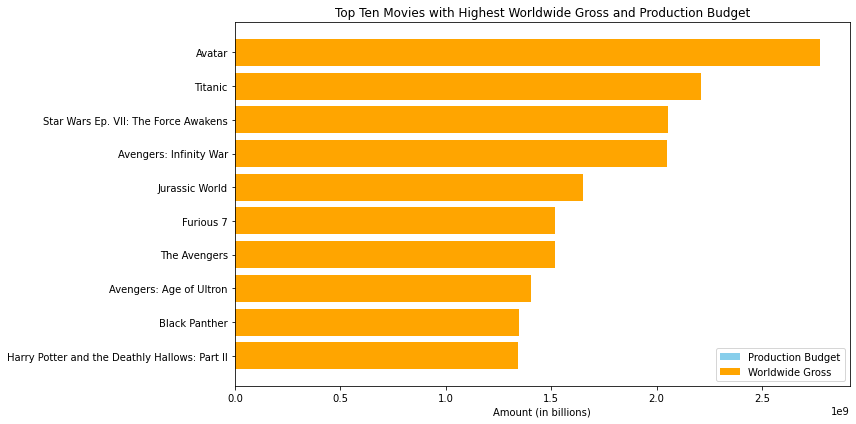

In [88]:
# Sort the DataFrame by worldwide gross in descending order and select the top ten movies
top_ten_movies = df_movie_budget.sort_values(by='worldwide_gross', ascending=False).head(10)

# Create a bar plot to visualize the production budget and worldwide gross of the top ten movies
plt.figure(figsize=(12, 6))
plt.barh(top_ten_movies['movie'], top_ten_movies['production_budget'], color='skyblue', label='Production Budget')
plt.barh(top_ten_movies['movie'], top_ten_movies['worldwide_gross'], color='orange', label='Worldwide Gross')
plt.xlabel('Amount (in billions)')
plt.title('Top Ten Movies with Highest Worldwide Gross and Production Budget')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the top-grossing movie at the top
plt.tight_layout()
plt.show()


## Results 
This analysis clearly shows that the higher the Production_budget, the higher the the worldgross_budget, hence more profits.

## 5.3 Recommendations

Based on the analysis results, here are some recommendations for Microsoft:

1. Investment in High Production Budget Films: The analysis indicates a moderate positive correlation between production budget and profitability. Microsoft may consider investing in films with higher production budgets, as they tend to have higher profitability. However, it's important to conduct further research and due diligence before making significant investments.

2. Diversify Genre Portfolio: While Drama is the most popular genre, it's essential to diversify the genre portfolio. Documentaries also perform well, and Microsoft may explore opportunities in this genre. Diversification can reduce risk and cater to a broader audience.

3. Consider Audience Preferences: Although there is no strong correlation between average ratings and profitability, Microsoft should still consider audience preferences. Focus on producing quality content that resonates with viewers to build a positive reputation in the film industry.

4. Runtime and Genre Analysis: The analysis shows that the most popular genres may not have the highest runtime. Microsoft should carefully select genres that align with audience expectations while considering runtime. Balancing genre popularity and runtime can lead to successful film projects.

5. Monitor Industry Trends: Stay updated with industry trends and evolving audience preferences. The film industry is dynamic, and what works today may not work tomorrow. Continuous market research and adaptation are crucial.

6. Collaborate and Partner: Consider collaborating with experienced production companies and filmmakers. Partnering with industry experts can provide valuable insights and enhance the chances of success.

7. Budget Allocation: Allocate budgets strategically based on genre and production requirements. Consider both potential profitability and production costs when planning film projects.

8. Marketing and Distribution: Invest in effective marketing and distribution strategies to ensure that films reach a wide audience. A well-executed marketing plan can significantly impact a film's success.

9. International Market: Explore opportunities in the international market. Some genres and films perform exceptionally well in global markets, contributing to higher worldwide gross.

10. Data-Driven Decision-Making:Continue to use data analysis to drive decision-making. Regularly assess the performance of films and adjust strategies accordingly.

The film industry is competitive, and success is not guaranteed. The company should approach film investments with a long-term perspective, considering both financial goals and the desire to contribute quality content to the entertainment industry.